# Housing price example

This is a simple exercise to get data into dataframes so I can learn how to investigate, interpret.
The sample attempts to show how to correlate to different attributes of a set of data, namely the size of a house and its sale price.


In [27]:
import pandas as pd
%matplotlib inline 
df = pd.DataFrame([[800,  200000,2015], 
                   [1000, 250000,2010],
                   [900,  300000,2011],
                   [1000, 175000,1999],
                   [2000, 400000,2005],
                   [2200, 410000,2005],
                   [5000, 595000,1985],
                   [3000, 200000,1980],
                   [1200, 210000,2017]],
                  columns=['Sq Ft.', 'Sale Price', 'Yr Blt.'])

# Standard deviation is the square of the variance
# print "Standard deviation on price", df['Sale Price'].std()
df.head()

,Sq Ft.,Sale Price,Yr Blt.
0,800,200000,2015
1,1000,250000,2010
2,900,300000,2011
3,1000,175000,1999
4,2000,400000,2005


OK, now we have some data, as you can see from the summary output above:
A data frame of some housing sizes, prices, and ages. 
But this data is not set up in a way that makes it good for analysis.
The number 900, for example, is not in the same order as 300000. How do we make these numbers relate to one another?

We express them as deviations from the mean, as in the next section.
We do some calculations of the data and add the results to the data frame, grow it so that it has more easily analyzable data. 

In [76]:
mean_price = int(df['Sale Price'].mean())
print "Mean price:", mean_price

df['Age']  = 2018 - df['Yr Blt.'] 
mean_age = df['Age'].mean()
print "Mean age:", mean_age

mean_size  = df['Sq Ft.'].mean()
print "Mean size:", mean_size
print

# not sure this is the right name / label
df['% Sale'] = (df['Sale Price'] - mean_price ) / mean_price * 100.
df['% Size'] = (df['Sq Ft.']     - mean_size )  / mean_size * 100.
df['% Age']  = (df['Age'] - mean_age ) / mean_age * 100.

small_d, big_d = df[df['Sq Ft.'] < 1100], df[df['Sq Ft.'] > 1100]
print "small house mean sale price", small_d['Sale Price'].mean()
print "big house mean sale price", big_d['Sale Price'].mean()
dd = df[['% Age','% Sale','% Size']]
# print dd['% Age']

Mean price: 304444
Mean age: 15.0
Mean size: 1900.0

small house mean sale price 231250.0
big house mean sale price 363000.0


In the table above the, we have only the data we want. We've cleared away the other stuff so that we can stare at this and figure out how to take action, where the distribution is, where the correlations are especially

## Exercise goals

So one next step might be to figure out how much the size of the house effects the sale price.
We might take up these three things actually:

 - Question: Does the size of the house effect the sale price?
   - You'd want to do something here like: For every foot or some _unit_ of size, you get a certain amount of dollars it matters 
 - Plot the sizes and the sale prices on a single plot (visualize)
 - Question: Which matters more?: The size of the house or the year it was built?
 
Could maybe send this to Stack Overflow as a question. But this is the kind of thing that's answered in discussions about statistics and dependent and idependent variables, which is where I might start. Regressions, etc.

So this is a **non-simple linear regression** in which we need to explore **dependent and independent variables**

See *Think Stats* Chapter 10, *Linear least square fit*, for a way into this and simple linear regressions. 

## Simple linear regression and least squares fit

xx


## Plotting (not histograms)

This may not be the deepest way to look at stuff, but in this section we're just comparing the curves.
The problem with this is that the blue line is in general not moving much, so we need to normalize it? Or this is where the variance is the more important thing to plot here? Confused. 

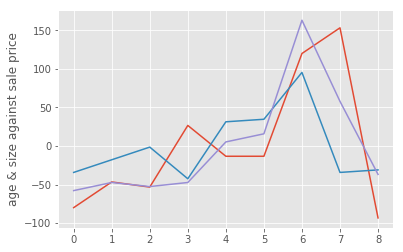

In [75]:
import matplotlib.pyplot as plt
plt.plot(dd['% Age'])  # blue
plt.plot(dd['% Sale']) # orange
plt.plot(dd['% Size']) # green/

plt.ylabel('age & size against sale price')
plt.show()


Here's an example from a [Python statistics tutorial](http://benalexkeen.com/basic-statistics-in-python/) that looks good too. This is a histogram of an array of random numbers between 1 and 10, which you can see ends up clustering frequency around the middle (but why?)

[ 8.  4.  4.  3.  7.  0.  8.  3.  6.  5.  8.  1.  4.  4.  7.  3.  5.  3.
  5.  6.  3.  7.  7.  6.  7.  4.  5.  3.  4.  6.  4.  4.  4.  3.  4.  5.
  3.  5.  8.  6.  5.  3.  4.  8.  5.  4.  5.  9.  5.  6.  6.  4.  3.  4.
  5.  6.  7.  7.  6.  7.  3.  8.  6.  4.  6.  5.  7.  8.  9.  2.  2.  4.
  5.  7.  6.  1.  4.  7.  5.  7.  5.  5.  5.  6.  5.  5.  4.  6.  5.  7.
  7.  5.  4.  4.  6.  5.  4.  5.  4.  6.]


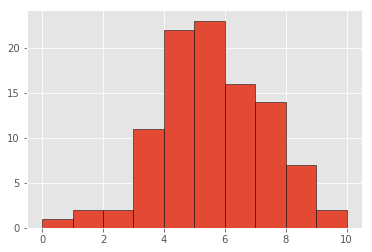

In [58]:
import numpy as np
from scipy import stats

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

np.random.seed(1)
data = np.round(np.random.normal(5, 2, 100))
print data
plt.hist(data, bins=10, range=(0,10), edgecolor='black')
plt.show()